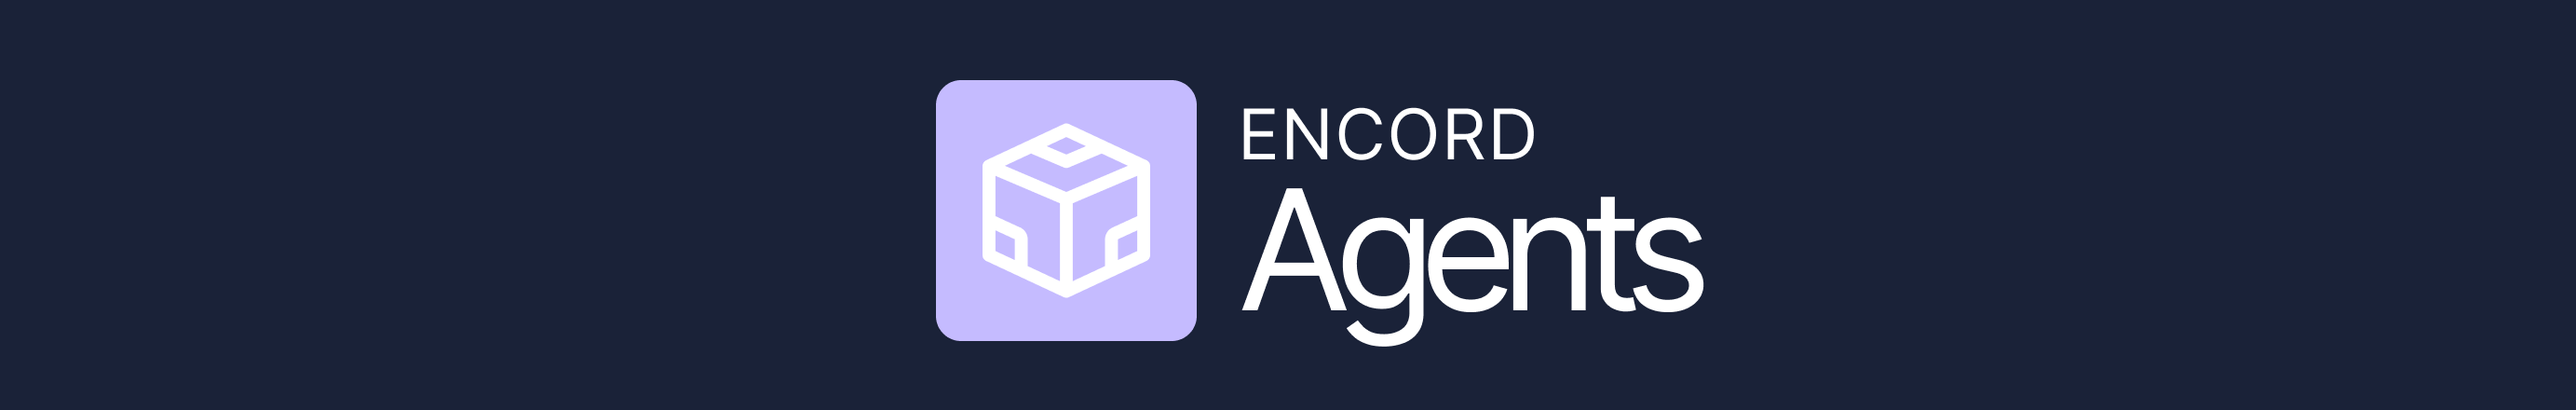


# Prioritize Annotation Tasks

This example demonstrates how to set up an agent early to automatically assign a [priority](https://docs.encord.com/platform-documentation/Annotate/annotate-projects/annotate-manage-annotation-projects#task-priority) to each task before advancing the task to the annotation stage.

### Example Workflow

This workflow helps prioritize tasks before they reach the annotation stage. To use this example effectively, ensure your workflow matches or closely resembles the one shown.

[📖 Here](https://docs.encord.com/platform-documentation/Annotate/annotate-projects/annotate-workflows-and-templates#creating-workflows) is the documentation for creating a workflow with Encord.

The code in this notebook is for the **prioritze** agent.


<figure style="text-align: center">
  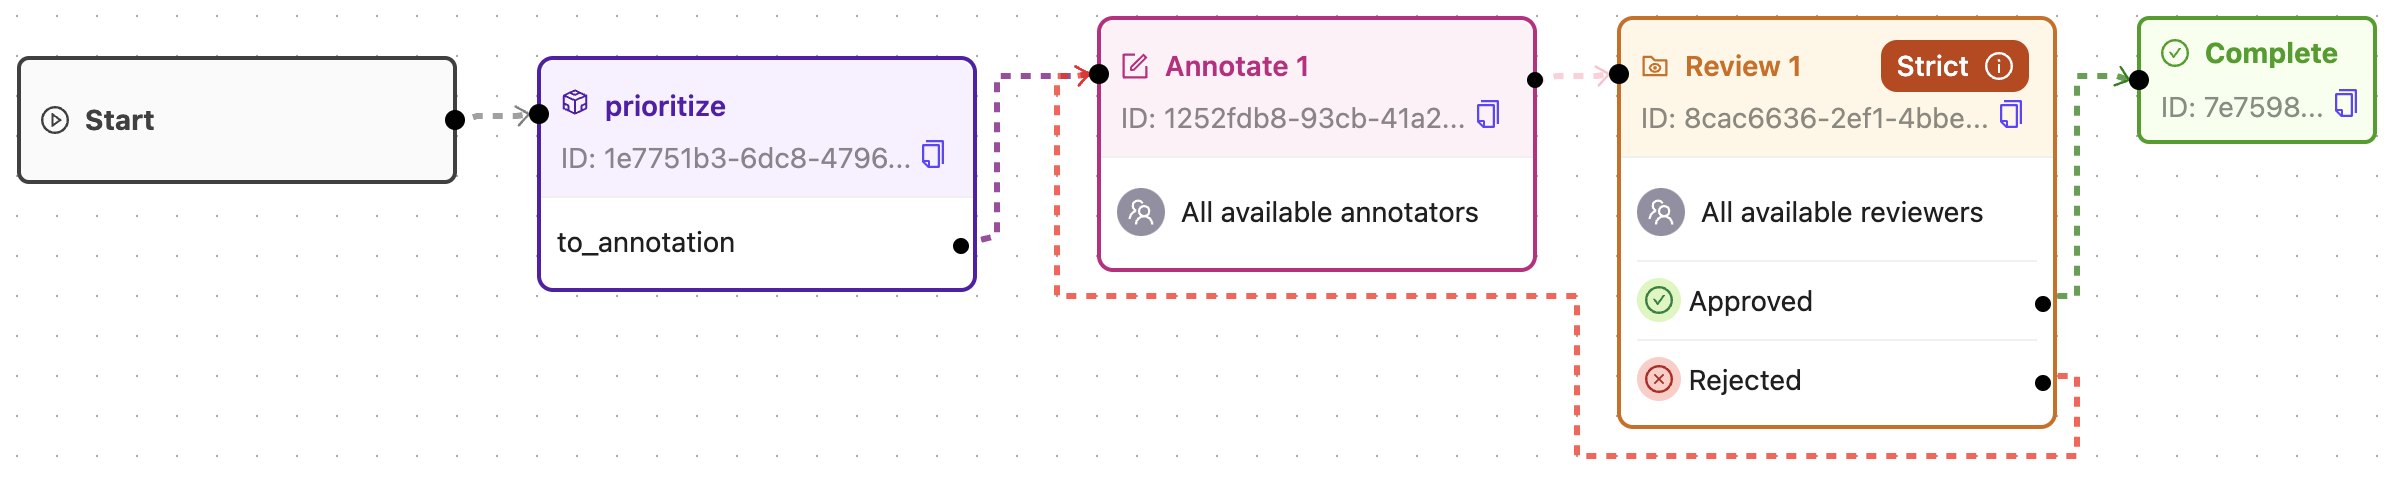
  <figcaption>Project Workflow</figcaption>
</figure>


### Installation

Ensure that you have the `encord-agents` library installed.

In [ ]:
!python -m pip install encord-agents

## Encord Authentication

Encord uses ssh-keys for authentication. The following is a code cell for setting the `ENCORD_SSH_KEY` environment variable. It contains the raw content of your private ssh key file.

If you have not setup an ssh key, see our [documentation](https://agents-docs.encord.com/authentication/).

> 💡 In colab, you can set the key once in the secrets in the left sidebar and load it in new notebooks. IF YOU ARE NOT RUNNING THE CODE IN THE COLLAB NOTEBOOK, you must set the environment variable directly.
> ```python
> os.environ["ENCORD_SSH_KEY"] = """paste-private-key-here"""
> ```

In [ ]:
import os

os.environ["ENCORD_SSH_KEY"] = "private_key_file_content"
# or you can set a path to a file
# os.environ["ENCORD_SSH_KEY_FILE"] = "/path/to/your/private/key"

#### [Alternative] Temporary Key
There's also the option of generating a temporary (fresh) ssh key pair via the code cell below.
Please follow the instructions printed when executing the code.

In [ ]:
# ⚠️ Safe to skip if you have authenticated already
import os

from encord_agents.utils.colab import generate_public_private_key_pair_with_instructions

private_key_path, public_key_path = generate_public_private_key_pair_with_instructions()
os.environ["ENCORD_SSH_KEY_FILE"] = private_key_path.as_posix()

## Define the Agent

In the following code cell, we define the custom code that adds a priority on a task.

Ensure that you add:
- `<your_project_hash>`: You obtain it from the Project page in the Encord platform.
- `<your_agent_stage_uuid>`: It would be "1e775..." in the example workflow above.
- `<your_pathway_uuid>`: It will be listed when you expand the agent node of the Workflow on the Project page. (You can also use the pathway name that you gave it)

In [ ]:
from encord.objects.ontology_labels_impl import LabelRowV2

from encord_agents.tasks import Runner

runner = Runner(project_hash="<your_project_hash>")


@runner.stage("<your_agent_stage_uuid>")
def by_file_name(lr: LabelRowV2) -> str | None:
    # Assuming the data_title is of the format "%d.jpg"
    # and in the range [0; 100]
    priority = int(lr.data_title.split(".")[0]) / 100
    lr.set_priority(priority=priority)
    return "<your_pathway_uuid>"

- **Task Runner:** The code initializes a runner to process tasks.
- **Priority Assignment:** It defines a stage implementation that:
  - Extracts the data title of a task.
  - Parses the stem of the data title as an integer.
  - Assigns a priority as a number between `0` and `1`.
- **Task Routing:** Passes the task to the annotation stage by returning the correct pathway `UUID`.


## Running the Agent

The `runner` object is callable which means that you can just call it to prioritize your tasks.

In [ ]:
# Run the Agent
# After 50 label updates, tasks are moved in the workflow.
# Set to refresh every 3600 seconds to continuously check for new tasks
runner(refresh_every=3600, task_batch_size=50, max_tasks_per_stage=None)

## Outcome

Your agent now assigns priorities to tasks based on their file names and routes them appropriately through the Workflow.

> 💡 To run this as a command-line interface, save the code in an `agents.py` file and replace:  
> ```python
> runner()
> ```  
> with:  
> ```python
> if __name__ == "__main__":
>     runner.run()
> ```  
> This lets you set parameters like the project hash from the command line:  
> ```bash
> python agent.py --project-hash "..."
> ```

